# Mini Project III

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA

## Import datasets

In [2]:
df_customer = pd.read_csv('data/twm_customer.csv', sep=';')
print(df_customer.shape)
df_customer.head()

(747, 15)


cust_id  income  age  years_with_bank  nbr_children gender  marital_status  \
0  1362691   26150   46                5             1     M                2   
1  1362487    6605   71                1             0     M                2   
2  1363160   18548   38                8             0     F                1   
3  1362752   47668   54                3             0     F                1   
4  1362548   44554   59                9             2     F                4   

  name_prefix                                         first_name  \
0              Donald                                        ...   
1              ChingDyi                                      ...   
2              Rosa                                          ...   
3              Lisa                                          ...   
4              Barbara                                       ...   

                                           last_name  street_nbr  \
0  Marek                                         ...        8298   
1  Moussavi                                      ...       10603   
2  Johnston                                      ...        8817   
3  Martin                                        ...         676   
4  O'Malley                                      ...        6578   

                                         street_name  postal_code  \
0  Second                                        ...        89194   
1  Daffodil                                      ...        90159   
2  Figueroa                                      ...        90024   
3  Humble                                        ...        90172   
4  C                                             ...        10138   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [3]:
# missing data
total = df_customer.isnull().sum().sort_values(ascending=False)
percent = (df_customer.isnull().sum()/df_customer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
cust_id              0      0.0
income               0      0.0
age                  0      0.0
years_with_bank      0      0.0
nbr_children         0      0.0
gender               0      0.0
marital_status       0      0.0
name_prefix          0      0.0
first_name           0      0.0
last_name            0      0.0
street_nbr           0      0.0
street_name          0      0.0
postal_code          0      0.0
city_name            0      0.0
state_code           0      0.0

In [4]:
df_customer['postal_code'].nunique()

442

In [5]:
df_customer.sort_values(by=['postal_code']).head()

cust_id  income  age  years_with_bank  nbr_children gender  \
643  1363349    7617   43                3             2     M    
609  1363351       0   15                7             0     F    
291  1363348   36259   45                5             2     F    
347  1363100   12599   37                3             0     M    
205  1362843   27303   59                9             1     F    

     marital_status name_prefix  \
643               2               
609               1               
291               2               
347               1               
205               3    Ms.        

                                            first_name  \
643  Andy                                          ...   
609  Jane                                          ...   
291  Grace                                         ...   
347  Ed                                            ...   
205  Teresa                                        ...   

                                             last_name  street_nbr  \
643  Cassidy                                       ...       18925   
609  Cassidy                                       ...       18925   
291  Cassidy                                       ...       18925   
347  Harris                                        ...       14587   
205  Pauly                                         ...        5513   

                                           street_name  postal_code  \
643  El Paso                                       ...         2149   
609  El Paso                                       ...         2149   
291  El Paso                                       ...         2149   
347  Parrot                                        ...         2158   
205  Inspiration                                   ...         2171   

                                    city_name state_code  
643  Boston                                         MA    
609  Boston                                         MA    
291  Boston                                         MA    
347  Boston                                         MA    
205  Boston                                         MA

In [6]:
df_customer['state_code'].nunique()

33

In [7]:
df_filtered = df_customer.drop(['cust_id', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code'], axis=1)
df_filtered.head()

income  age  years_with_bank  nbr_children gender  marital_status  \
0   26150   46                5             1     M                2   
1    6605   71                1             0     M                2   
2   18548   38                8             0     F                1   
3   47668   54                3             0     F                1   
4   44554   59                9             2     F                4   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

## One-hot encode categorical variables

In [8]:
cat_feats = df_filtered.dtypes[df_filtered.dtypes == 'object'].index.tolist()
df_encoded = pd.get_dummies(df_filtered[cat_feats])
df_encoded.head()

gender_F   gender_M   city_name_Albuquerque                               \
0          0          1                                                  0    
1          0          1                                                  0    
2          1          0                                                  0    
3          1          0                                                  0    
4          1          0                                                  0    

   city_name_Anaheim                                   \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Arlington                                 \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Atlanta                                   \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Austin                                    \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Baltimore                                 \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Birmingham                                \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Boston                                    ...  state_code_NY    \
0                                                  0   ...                0   
1                                                  0   ...                0   
2                                                  0   ...                0   
3                                                  0   ...                0   
4                                                  0   ...                1   

   state_code_OH    state_code_OK    state_code_OR    state_code_PA    \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   state_code_TN    state_code_TX    state_code_VA    state_code_WA    \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   state_code_WI    
0                0  
1                0  
2                0  
3                0  
4           

In [9]:
df_encoded = pd.concat([df_filtered.drop(['gender','city_name','state_code'], axis=1), df_encoded], axis=1)
df_encoded.head()

income  age  years_with_bank  nbr_children  marital_status  gender_F   \
0   26150   46                5             1               2          0   
1    6605   71                1             0               2          0   
2   18548   38                8             0               1          1   
3   47668   54                3             0               1          1   
4   44554   59                9             2               4          1   

   gender_M   city_name_Albuquerque                               \
0          1                                                  0    
1          1                                                  0    
2          0                                                  0    
3          0                                                  0    
4          0                                                  0    

   city_name_Anaheim                                   \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Arlington                                 ...  state_code_NY    \
0                                                  0   ...                0   
1                                                  0   ...                0   
2                                                  0   ...                0   
3                                                  0   ...                0   
4                                                  0   ...                1   

   state_code_OH    state_code_OK    state_code_OR    state_code_PA    \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   state_code_TN    state_code_TX    state_code_VA    state_code_WA    \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   state_code_WI    
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 109 columns]

## Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = sc.fit_transform(df_encoded)

## PCA

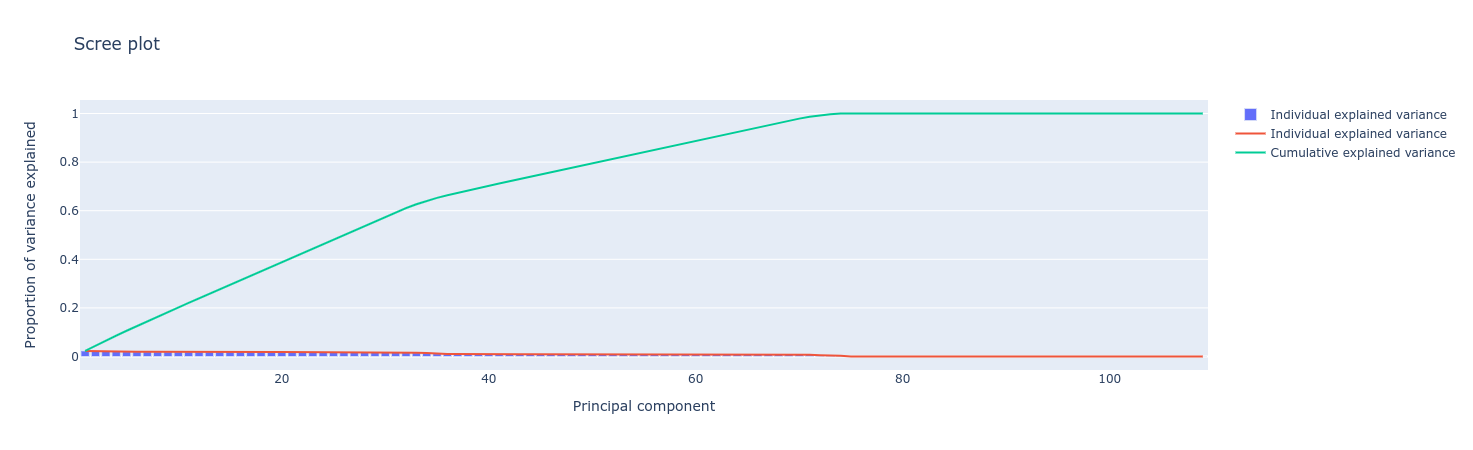

In [11]:
import plotly.graph_objects as go

pca = sklearnPCA(n_components=df_scaled.shape[1])
df_pca = pca.fit_transform(df_scaled)

x = np.arange(1, df_scaled.shape[1] + 1)

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=np.cumsum(pca.explained_variance_ratio_), name='Cumulative explained variance'))

fig.update_layout(title='Scree plot',
                   xaxis_title='Principal component',
                   yaxis_title='Proportion of variance explained')
fig.show()

## Try only with numeric values

In [12]:
df_filtered.head()

income  age  years_with_bank  nbr_children gender  marital_status  \
0   26150   46                5             1     M                2   
1    6605   71                1             0     M                2   
2   18548   38                8             0     F                1   
3   47668   54                3             0     F                1   
4   44554   59                9             2     F                4   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [13]:
df_num = df_filtered.drop(['gender','city_name', 'state_code', 'marital_status'], axis=1)
df_num.head()

income  age  years_with_bank  nbr_children
0   26150   46                5             1
1    6605   71                1             0
2   18548   38                8             0
3   47668   54                3             0
4   44554   59                9             2

In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = sc.fit_transform(df_num)

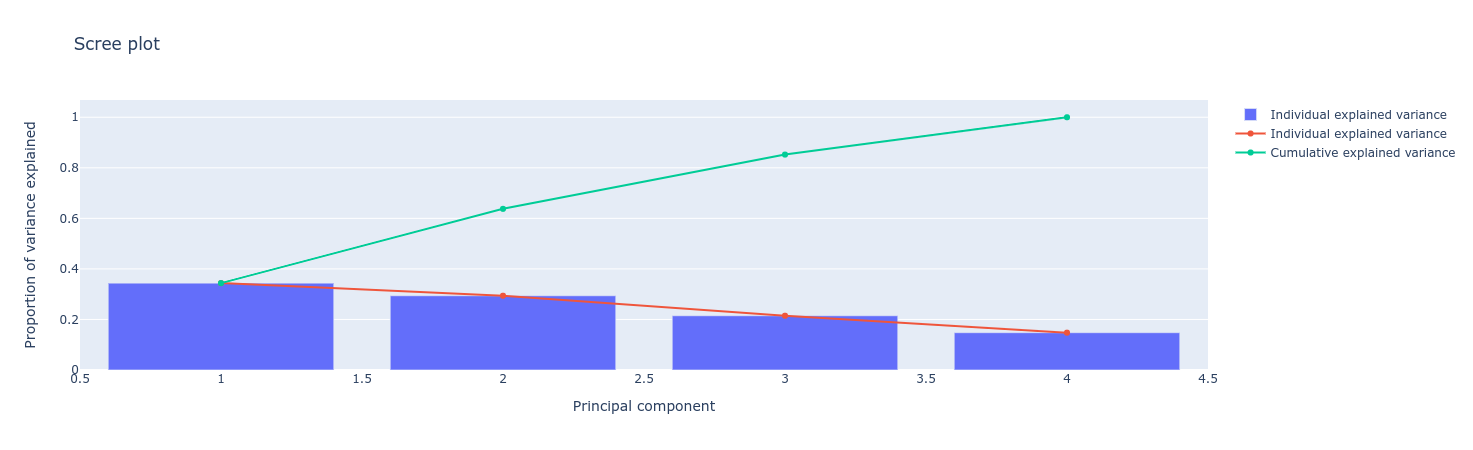

In [15]:
import plotly.graph_objects as go

pca = sklearnPCA(n_components=df_scaled.shape[1])
df_pca = pca.fit_transform(df_scaled)

x = np.arange(1, df_scaled.shape[1] + 1)

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=np.cumsum(pca.explained_variance_ratio_), name='Cumulative explained variance'))

fig.update_layout(title='Scree plot',
                   xaxis_title='Principal component',
                   yaxis_title='Proportion of variance explained')
fig.show()

In [16]:
# calculate covariance matrix of centered matrix
V = np.cov(df_scaled.T)
# eigendecomposition of covariance matrix
values, _ = np.linalg.eig(V)
print(values)

[0.5916181  1.37675729 0.85999483 1.17699172]


## Apply kmeans

In [17]:
# import Kmeans 
from sklearn.cluster import KMeans
# import matplotlib
import matplotlib.pyplot as plt
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

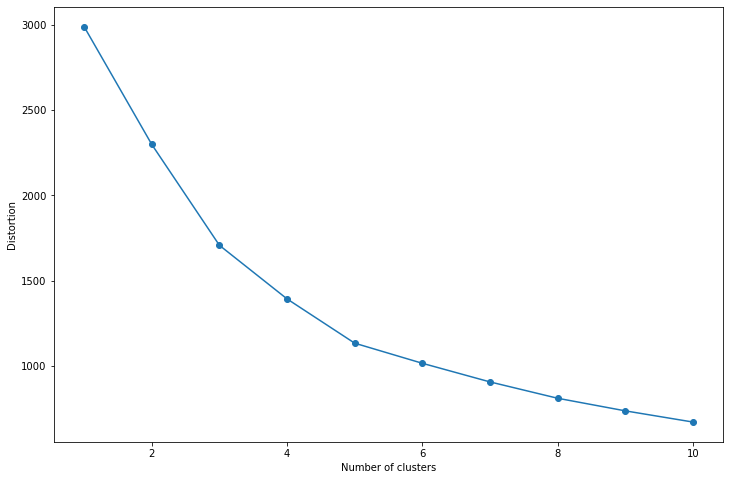

In [18]:
plot_distortion(df_scaled,max_clusters=10)

Try with 5 clusters

In [19]:
km = KMeans(n_clusters=3,
            n_init=30)

In [20]:
y_km = km.fit_predict(df_scaled)

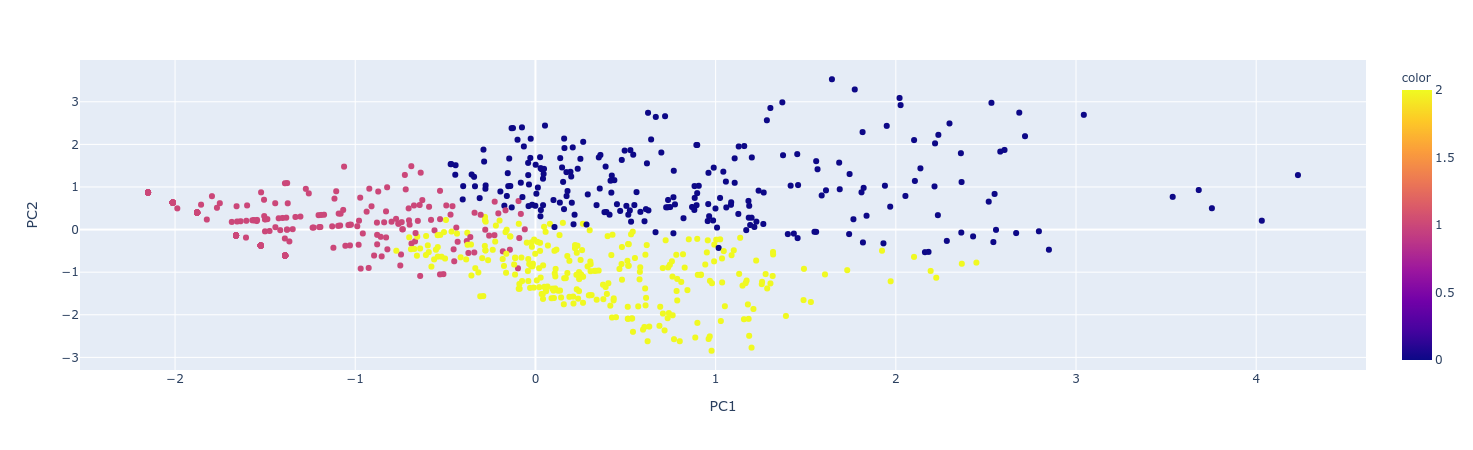

In [21]:
import plotly.express as px

pca = sklearnPCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
fig = px.scatter(df_pca, x=0, y=1, color=y_km, labels={'0':'PC1', '1':'PC2'})
fig.show()

## Try to include gender

In [22]:
df_filtered.head()

income  age  years_with_bank  nbr_children gender  marital_status  \
0   26150   46                5             1     M                2   
1    6605   71                1             0     M                2   
2   18548   38                8             0     F                1   
3   47668   54                3             0     F                1   
4   44554   59                9             2     F                4   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [23]:
df_filtered['marital_status'].value_counts()

2    353
1    276
4     70
3     48
Name: marital_status, dtype: int64

In [24]:
df_ver2 = df_filtered.replace({'marital_status':{1:'S', 2:'M', 3:'W', 4:'D'}})
df_ver2.head()

income  age  years_with_bank  nbr_children gender marital_status  \
0   26150   46                5             1     M               M   
1    6605   71                1             0     M               M   
2   18548   38                8             0     F               S   
3   47668   54                3             0     F               S   
4   44554   59                9             2     F               D   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [25]:
df_ver2.dtypes

income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status     object
city_name          object
state_code         object
dtype: object

In [26]:
df_ver2 = df_ver2.drop(['city_name', 'state_code'], axis=1)
df_ver2.head()

income  age  years_with_bank  nbr_children gender marital_status
0   26150   46                5             1     M               M
1    6605   71                1             0     M               M
2   18548   38                8             0     F               S
3   47668   54                3             0     F               S
4   44554   59                9             2     F               D

In [27]:
cat_feats = df_ver2.dtypes[df_ver2.dtypes == 'object'].index.tolist()
df_ver2_enc = pd.get_dummies(df_ver2[cat_feats])
df_ver2_enc.head()

gender_F   gender_M   marital_status_D  marital_status_M  marital_status_S  \
0          0          1                 0                 1                 0   
1          0          1                 0                 1                 0   
2          1          0                 0                 0                 1   
3          1          0                 0                 0                 1   
4          1          0                 1                 0                 0   

   marital_status_W  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [28]:
df_ver2 = pd.concat([df_ver2.drop(cat_feats, axis=1), df_ver2_enc], axis=1)
df_ver2.head()

income  age  years_with_bank  nbr_children  gender_F   gender_M   \
0   26150   46                5             1          0          1   
1    6605   71                1             0          0          1   
2   18548   38                8             0          1          0   
3   47668   54                3             0          1          0   
4   44554   59                9             2          1          0   

   marital_status_D  marital_status_M  marital_status_S  marital_status_W  
0                 0                 1                 0                 0  
1                 0                 1                 0                 0  
2                 0                 0                 1                 0  
3                 0                 0                 1                 0  
4                 1                 0                 0                 0

## Feature scale then PCA

In [29]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = sc.fit_transform(df_ver2)

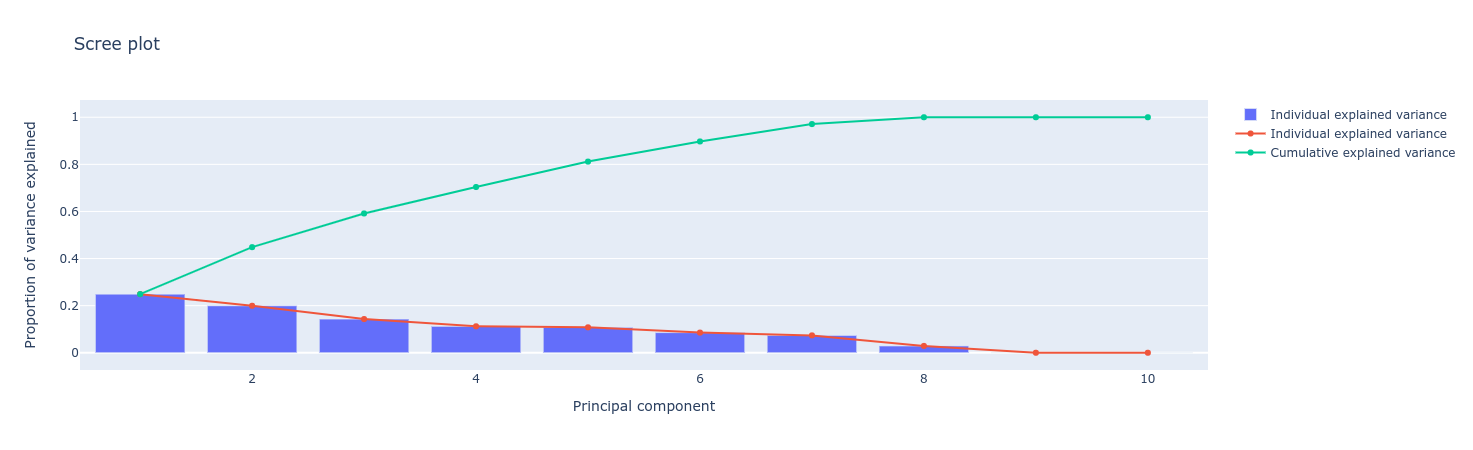

In [30]:
import plotly.graph_objects as go

pca = sklearnPCA(n_components=df_scaled.shape[1])
df_pca = pca.fit_transform(df_scaled)

x = np.arange(1, df_scaled.shape[1] + 1)

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=np.cumsum(pca.explained_variance_ratio_), name='Cumulative explained variance'))

fig.update_layout(title='Scree plot',
                   xaxis_title='Principal component',
                   yaxis_title='Proportion of variance explained')
fig.show()

In [31]:
# calculate covariance matrix of centered matrix
V = np.cov(df_scaled.T)
# eigendecomposition of covariance matrix
values, _ = np.linalg.eig(V)
print(values)

[ 2.49227977e+00  1.99745821e+00  2.90031842e-01  1.43294042e+00
  7.38737810e-01  8.56853034e-01  1.12450877e+00  1.08059497e+00
  2.81774148e-15 -1.42937093e-18]


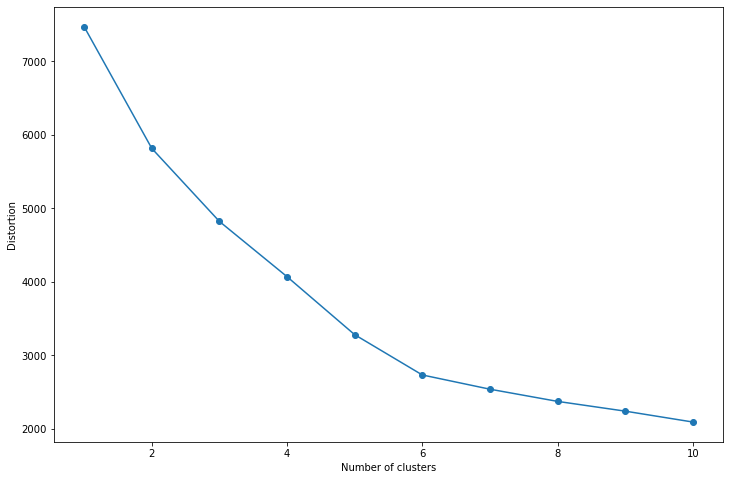

In [32]:
plot_distortion(df_scaled, 10)

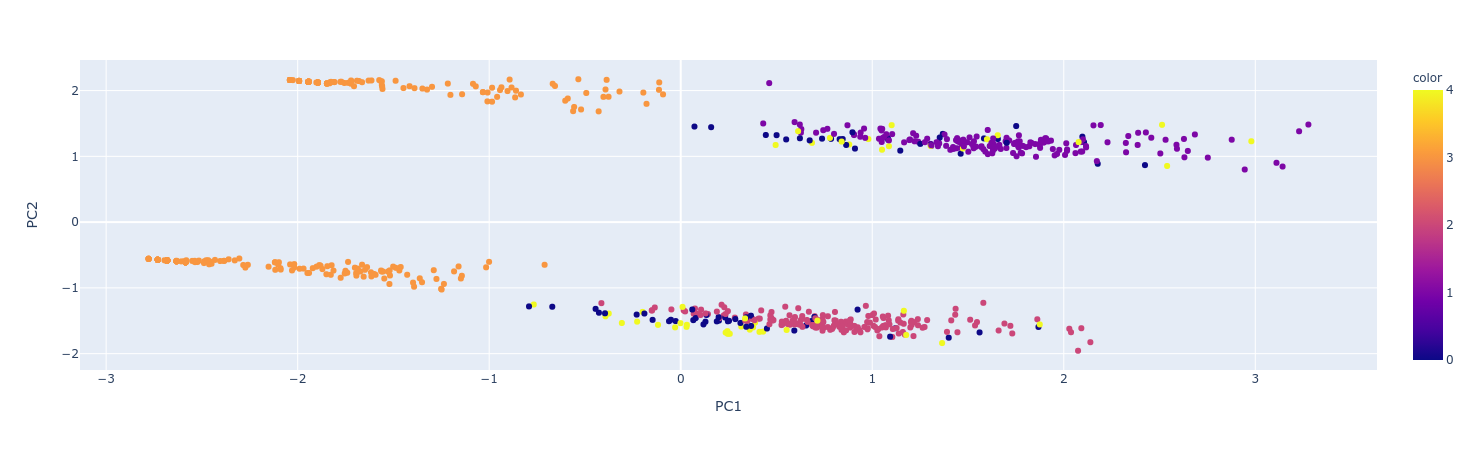

In [33]:
km = KMeans(n_clusters=5,
            n_init=10)

y_km = km.fit_predict(df_scaled)

import plotly.express as px

pca = sklearnPCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
fig = px.scatter(df_pca, x=0, y=1, color=y_km, labels={'0':'PC1', '1':'PC2'})
fig.show()

# Try label encoding gender only

In [34]:
df_filtered.head()

income  age  years_with_bank  nbr_children gender  marital_status  \
0   26150   46                5             1     M                2   
1    6605   71                1             0     M                2   
2   18548   38                8             0     F                1   
3   47668   54                3             0     F                1   
4   44554   59                9             2     F                4   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [35]:
# Why doesn't this work?

#df_ver3 = df_filtered.replace({"gender" : {"M": 0, "F": 1}})
#df_ver3.head()

In [36]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df_ver3 = df_filtered
df_ver3['gender'] = le.fit_transform(df_filtered['gender'].values)
df_ver3.head()

income  age  years_with_bank  nbr_children  gender  marital_status  \
0   26150   46                5             1       1               2   
1    6605   71                1             0       1               2   
2   18548   38                8             0       0               1   
3   47668   54                3             0       0               1   
4   44554   59                9             2       0               4   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [37]:
df_ver3 = df_ver3.drop(['city_name','state_code','marital_status'], axis=1)
df_ver3.head()

income  age  years_with_bank  nbr_children  gender
0   26150   46                5             1       1
1    6605   71                1             0       1
2   18548   38                8             0       0
3   47668   54                3             0       0
4   44554   59                9             2       0

In [38]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = sc.fit_transform(df_ver3)

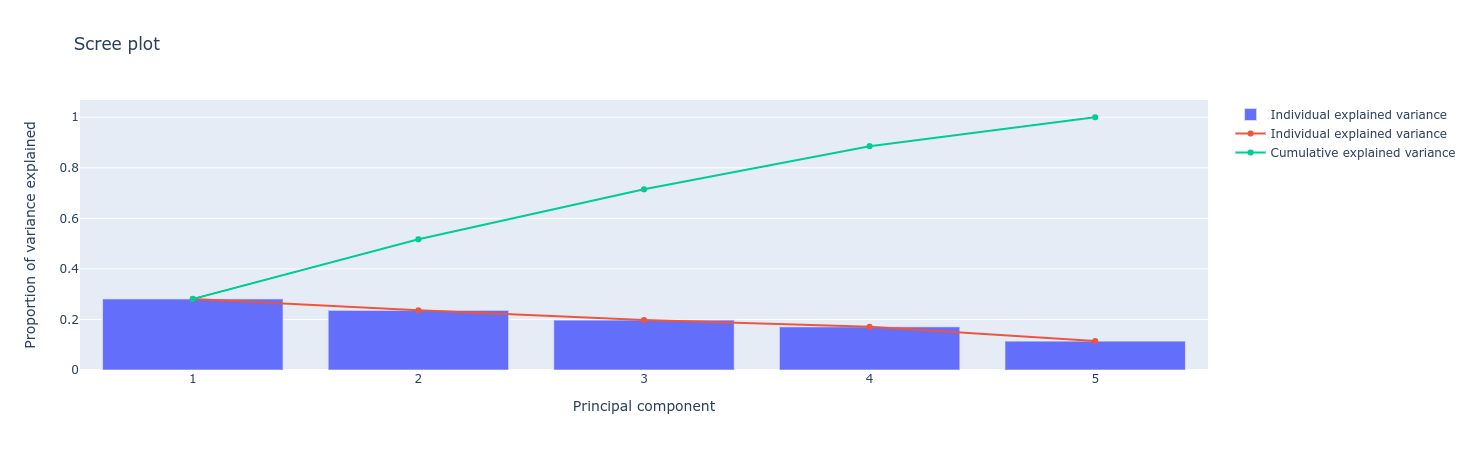

In [39]:
import plotly.graph_objects as go

pca = sklearnPCA(n_components=df_scaled.shape[1])
df_pca = pca.fit_transform(df_scaled)

x = np.arange(1, df_scaled.shape[1] + 1)

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=pca.explained_variance_ratio_, name='Individual explained variance'))

fig.add_trace(go.Scatter(x=x, y=np.cumsum(pca.explained_variance_ratio_), name='Cumulative explained variance'))

fig.update_layout(title='Scree plot',
                   xaxis_title='Principal component',
                   yaxis_title='Proportion of variance explained')
fig.show()

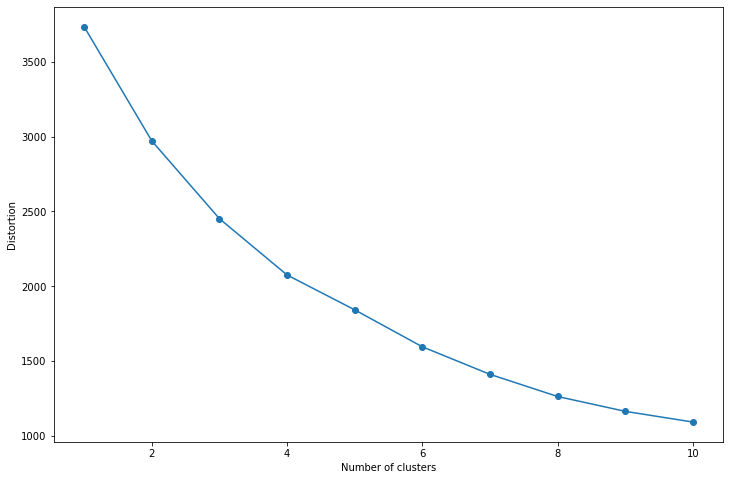

In [40]:
plot_distortion(df_scaled, 10)

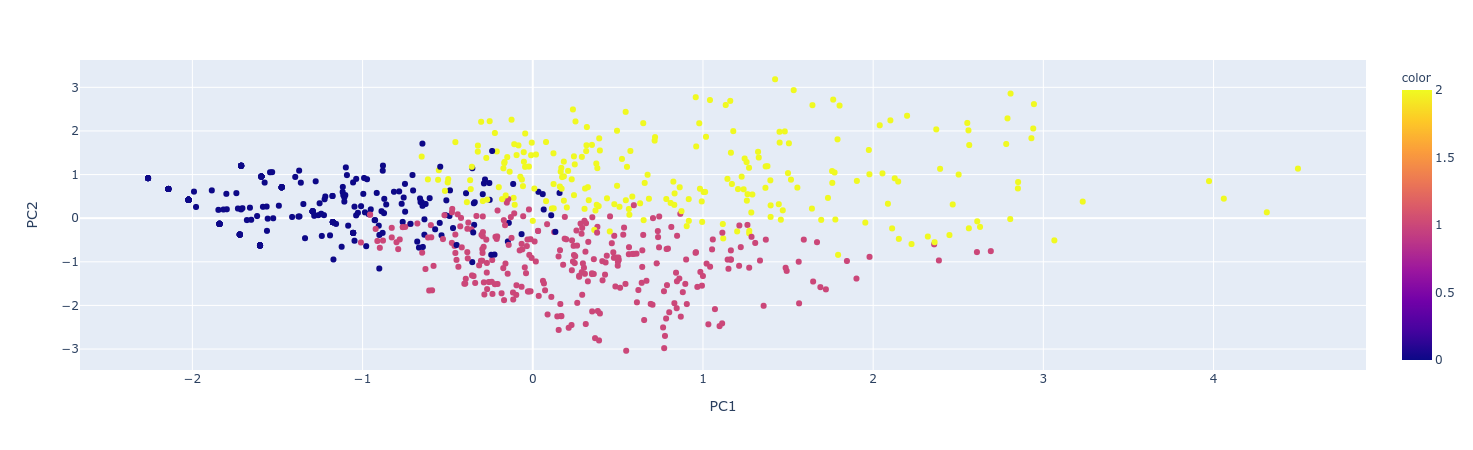

In [41]:
km = KMeans(n_clusters=3,
            n_init=10)

y_km = km.fit_predict(df_scaled)

import plotly.express as px

pca = sklearnPCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
fig = px.scatter(df_pca, x=0, y=1, color=y_km, labels={'0':'PC1', '1':'PC2'})
fig.show()

In [42]:
type(y_km)

numpy.ndarray

In [43]:
print(y_km)

[1 1 1 1 2 2 0 1 2 1 0 0 0 0 2 0 0 0 1 0 2 1 1 1 2 1 0 0 1 1 1 2 2 2 0 2 0
 1 1 0 0 2 1 2 1 1 2 0 2 2 0 0 2 1 1 1 2 1 1 0 2 0 0 1 2 0 1 2 0 0 0 2 1 1
 1 1 0 1 0 0 2 1 1 0 1 2 1 2 2 1 2 0 0 0 0 1 0 1 1 2 1 2 2 1 2 1 2 1 2 1 0
 1 1 1 2 0 2 1 2 2 2 2 1 2 0 1 0 1 2 0 1 0 0 1 1 0 1 2 0 2 1 1 2 0 1 0 1 1
 1 2 0 1 1 2 1 1 0 1 2 2 1 1 0 2 2 2 1 0 1 1 2 1 1 1 0 0 2 2 1 1 0 0 1 0 2
 1 1 2 1 2 1 2 0 0 2 0 0 0 2 2 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 2 0 2 1 2 1 2
 2 2 0 2 1 1 2 0 0 0 0 0 0 0 2 2 1 1 0 0 1 1 0 1 2 1 1 1 2 1 2 1 2 1 1 1 1
 1 2 1 2 2 0 0 1 0 2 2 2 0 0 0 1 2 1 2 1 0 0 1 1 2 2 0 0 2 2 0 0 2 2 0 2 0
 1 2 0 0 0 0 1 0 1 1 2 2 2 1 2 0 1 2 0 2 0 1 2 2 1 1 2 0 2 1 0 2 0 1 0 2 1
 2 0 1 0 1 2 2 0 2 1 0 0 1 2 0 1 2 0 2 2 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 2
 1 1 0 2 1 2 0 1 0 0 1 1 0 0 0 2 0 1 2 2 1 1 1 2 1 0 0 0 2 1 1 2 1 1 1 1 2
 0 0 2 2 1 0 1 1 0 1 2 1 2 0 1 2 2 1 0 2 2 2 1 2 0 1 1 0 0 1 1 0 0 1 0 2 0
 2 0 1 1 1 1 1 2 1 2 0 2 0 1 1 1 2 1 0 0 0 2 2 1 1 0 0 2 0 0 0 1 0 0 0 2 0
 0 1 0 2 2 2 2 1 2 2 1 1 

In [44]:
selected_columns = df_ver3.columns
df_final = pd.DataFrame(df_scaled, columns = selected_columns)
df_final.head()

income       age  years_with_bank  nbr_children    gender
0  0.154185  0.184312         0.408539      0.258591  1.127172
1 -0.726524  1.493070        -1.087435     -0.648298  1.127172
2 -0.188366 -0.234490         1.530520     -0.648298 -0.887176
3  1.123798  0.603115        -0.339448     -0.648298 -0.887176
4  0.983479  0.864867         1.904514      1.165479 -0.887176

In [45]:
df_final['category'] = y_km
df_final.head()

income       age  years_with_bank  nbr_children    gender  category
0  0.154185  0.184312         0.408539      0.258591  1.127172         1
1 -0.726524  1.493070        -1.087435     -0.648298  1.127172         1
2 -0.188366 -0.234490         1.530520     -0.648298 -0.887176         1
3  1.123798  0.603115        -0.339448     -0.648298 -0.887176         1
4  0.983479  0.864867         1.904514      1.165479 -0.887176         2

## Radar plots

In [46]:
df_customer['gender'].value_counts()

F     418
M     329
Name: gender, dtype: int64

In [47]:
means0 = df_final[df_final['category'] == 0].mean(axis=0)[:-1]
means1 = df_final[df_final['category'] == 1].mean(axis=0)[:-1]
means2 = df_final[df_final['category'] == 2].mean(axis=0)[:-1]

In [48]:
means0

income            -0.666574
age               -1.071657
years_with_bank   -0.223651
nbr_children      -0.530668
gender            -0.019068
dtype: float64

In [49]:
features = list(df_final.columns)[:-1]

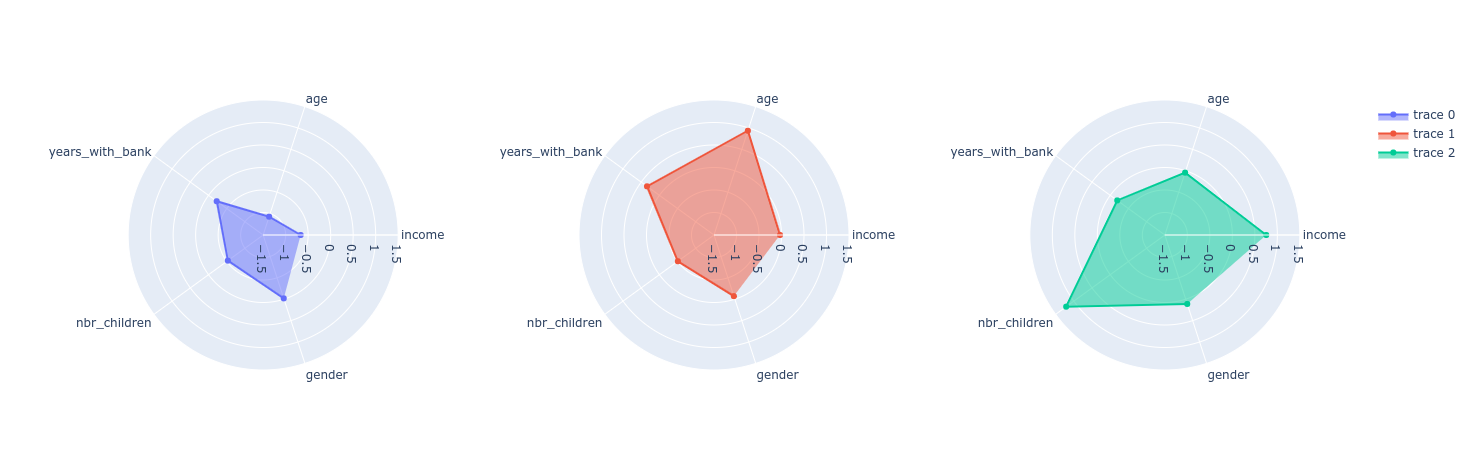

In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]])

fig.add_trace(
go.Scatterpolar(
  r= means0,
  theta= features,
  fill='toself',
), row=1, col=1)

fig.update_xaxes(range=[-2,2])

fig.add_trace(
go.Scatterpolar(
  r= means1,
  theta= features,
  fill='toself'
), row=1, col=2)

fig.add_trace(
go.Scatterpolar(
  r= means2,
  theta= features,
  fill='toself'
), row=1, col=3)

fig.update_polars(radialaxis={'range': [-1.5,1.5]})


fig.show()